## Linear regression using Neural Network
### Predict stock prices in time series data (Instabul Stock) based  on the 

Based on the data column description:

    Istanbul stock exchange national 100 index
    Standard & poor's 500 return index
    Stock market return index of Germany
    Stock market return index of UK
    Stock market return index of Japan
    Stock market return index of Brazil
    MSCI European index
    MSCI emerging markets index



In [231]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as mystats
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline


In [232]:
# import data
stock_price= pd.read_csv('istanbul_stock_dataset.csv')

In [233]:
stock_price.head()

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,date
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,2009-01-05
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,2009-01-06
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,2009-01-07
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,2009-01-08
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,2009-01-09


In [234]:
## Check the shape
stock_price.shape

(536, 10)

## Check the types of data

In [235]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
ISE_TL     536 non-null float64
ISE_USD    536 non-null float64
SP         536 non-null float64
DAX        536 non-null float64
FTSE       536 non-null float64
NIKKEI     536 non-null float64
BOVESPA    536 non-null float64
EU         536 non-null float64
EM         536 non-null float64
date       536 non-null object
dtypes: float64(9), object(1)
memory usage: 42.0+ KB


## Summary

In [236]:
stock_price.describe()

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.001629,0.001552,0.000643,0.000721,0.000510,0.000308,0.000935,0.000471,0.000936
std,0.016264,0.021122,0.014093,0.014557,0.012656,0.014850,0.015751,0.012990,0.010501
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564
25%,-0.006669,-0.009753,-0.004675,-0.006212,-0.005808,-0.007407,-0.007215,-0.005952,-0.004911
50%,0.002189,0.002643,0.000876,0.000887,0.000409,0.000000,0.000279,0.000196,0.001077
75%,0.010584,0.013809,0.006706,0.008224,0.007428,0.007882,0.008881,0.007792,0.006423
max,0.068952,0.100621,0.068366,0.058951,0.050323,0.061229,0.063792,0.067042,0.047805


In [237]:
## describe all data
stock_price.describe(include='all')

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,date
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,536
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-11-01
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,0.001629,0.001552,0.000643,0.000721,0.000510,0.000308,0.000935,0.000471,0.000936,NaN
std,0.016264,0.021122,0.014093,0.014557,0.012656,0.014850,0.015751,0.012990,0.010501,NaN
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564,NaN
25%,-0.006669,-0.009753,-0.004675,-0.006212,-0.005808,-0.007407,-0.007215,-0.005952,-0.004911,NaN
50%,0.002189,0.002643,0.000876,0.000887,0.000409,0.000000,0.000279,0.000196,0.001077,NaN
75%,0.010584,0.013809,0.006706,0.008224,0.007428,0.007882,0.008881,0.007792,0.006423,NaN


In [238]:
stock_price['date'].describe()

count            536
unique           536
top       2010-11-01
freq               1
Name: date, dtype: object

## Ckeck Missing values

In [239]:
stock_price.isnull().sum()

ISE_TL     0
ISE_USD    0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
date       0
dtype: int64

No missing value is the dataset

## Data Visualization

Let's create some simple plots to check out the data!

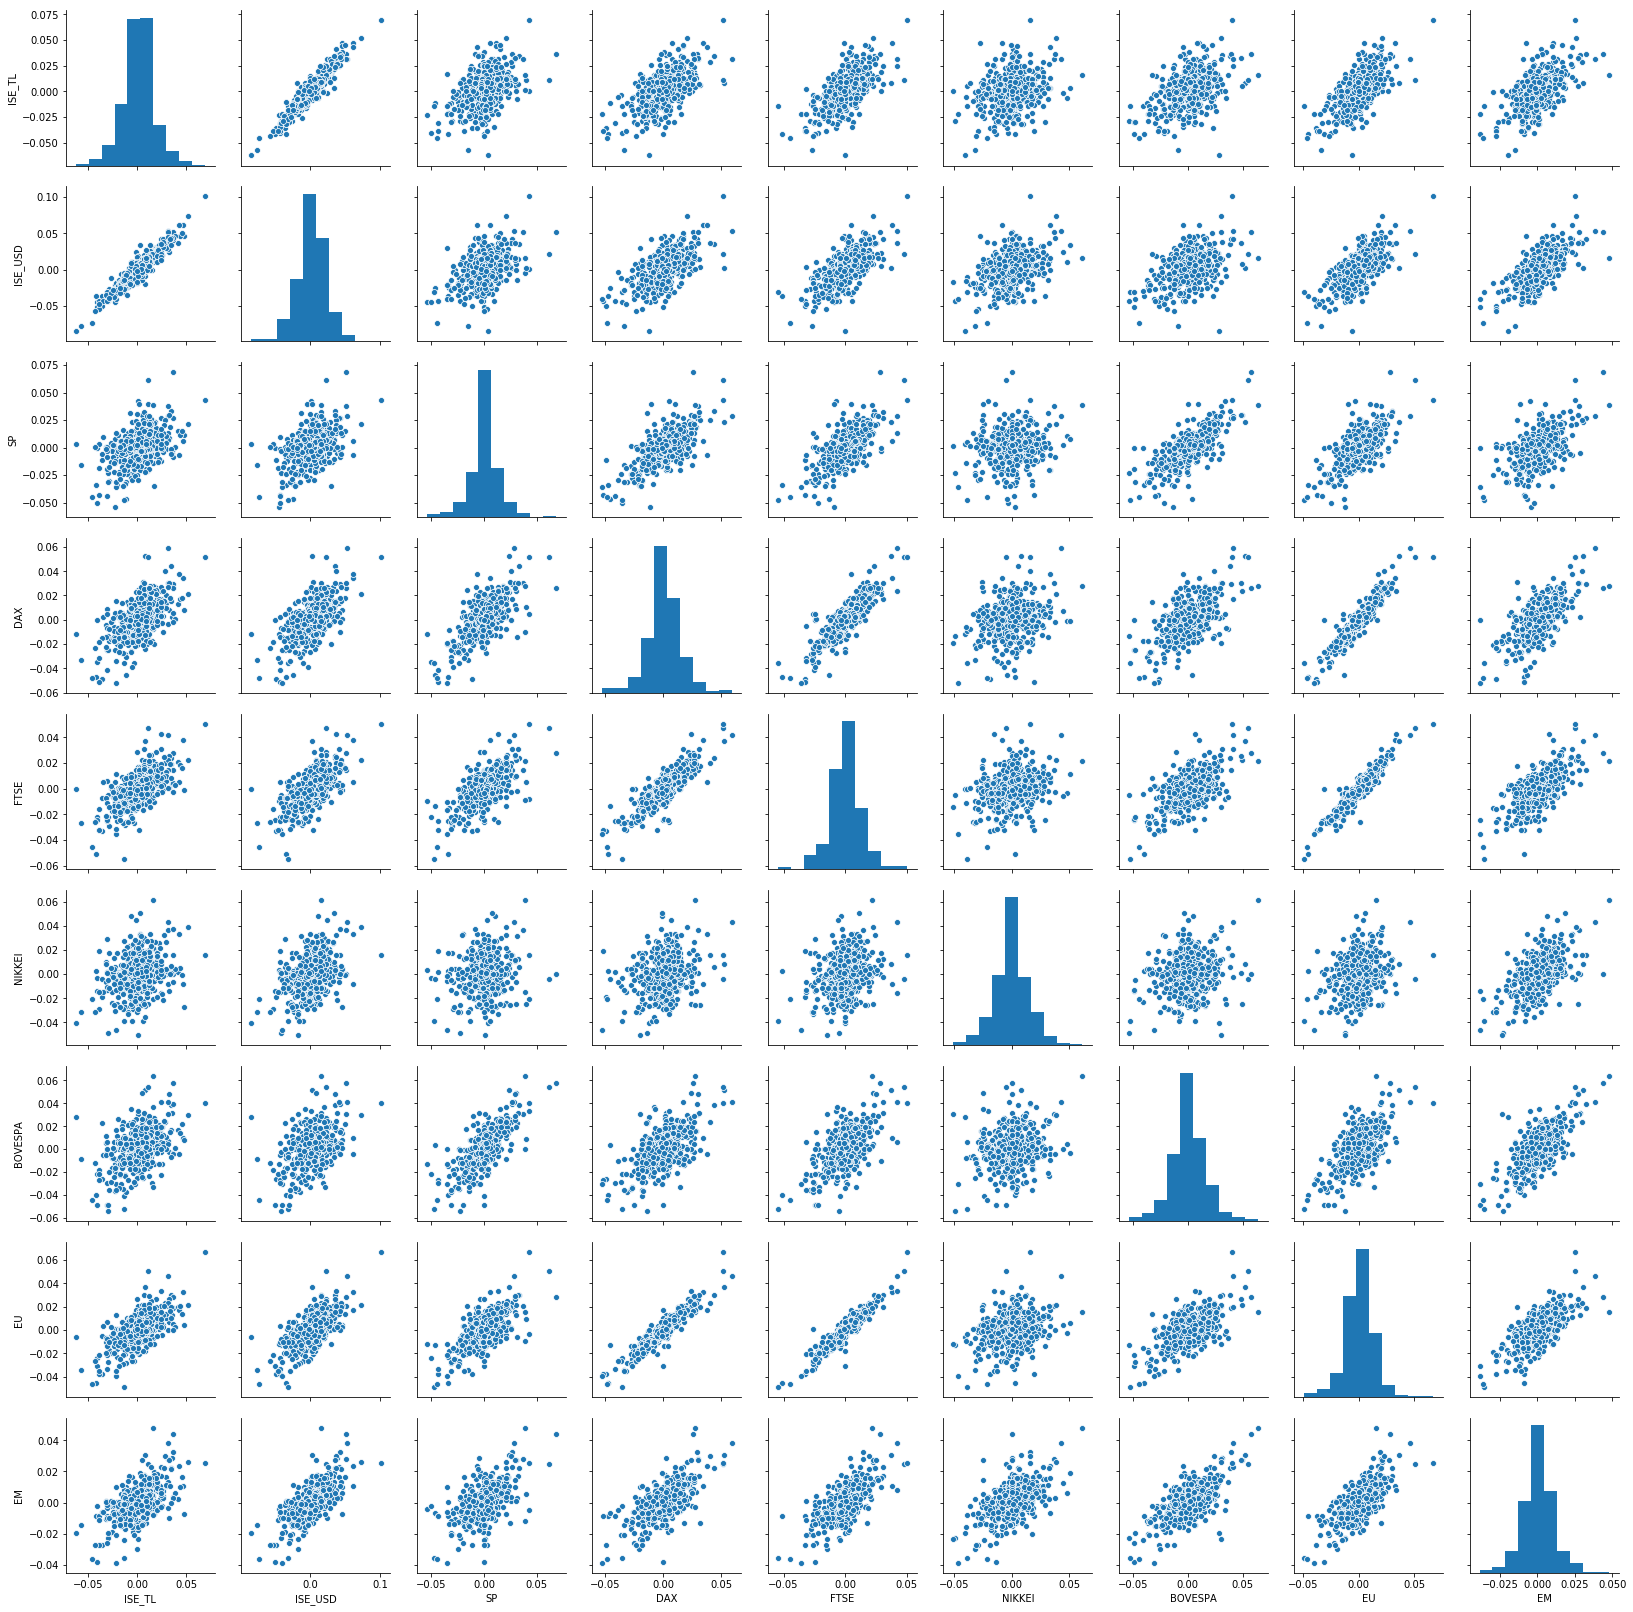

In [240]:
sns.pairplot(stock_price, palette='Set1')

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


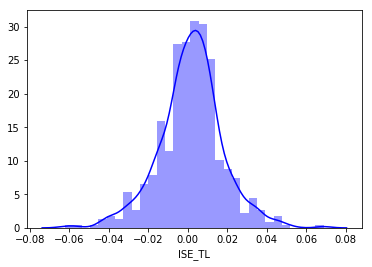

In [241]:
## ISE_TL plot distribution
sns.distplot(stock_price['ISE_TL'], color = 'b')

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


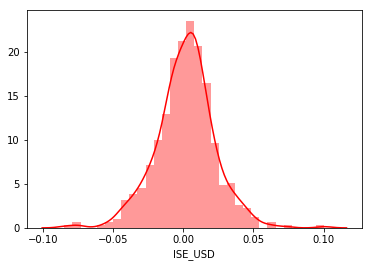

In [242]:
## ISE_US plot distribution 

sns.distplot(stock_price['ISE_USD'], color = 'r')

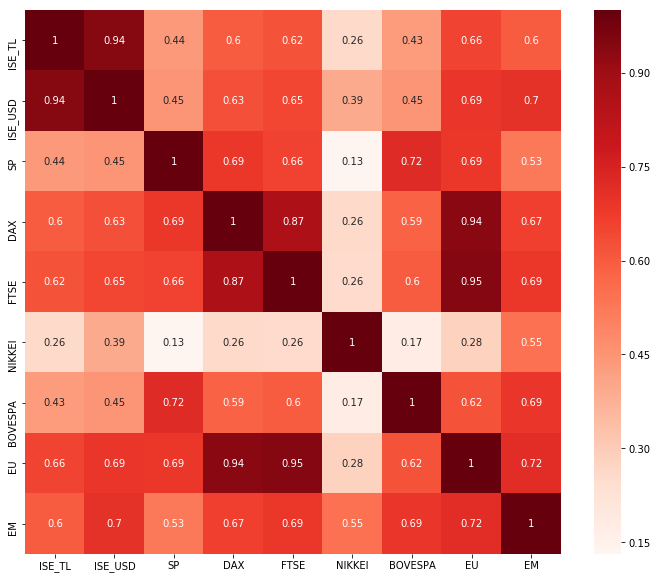

In [243]:
# correlation between data
plt.figure(figsize=(12,10))
cor = stock_price.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.Reds )

## Feature selection with filter method

In [244]:
#Correlation with output variable

cor_target = abs(cor["ISE_TL"])

In [245]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

ISE_TL     1.000000
ISE_USD    0.942897
DAX        0.602081
FTSE       0.622948
EU         0.655519
EM         0.600295
Name: ISE_TL, dtype: float64

 ### So let us check the correlation of selected features with each other.

In [246]:
print(stock_price[["ISE_USD","DAX"]].corr())
print(stock_price[["FTSE","EU"]].corr())

print(stock_price[["ISE_USD","EU"]].corr())
print(stock_price[["EU","EM"]].corr())

print(stock_price[["EU","FTSE"]].corr())

          ISE_USD       DAX
ISE_USD  1.000000  0.629218
DAX      0.629218  1.000000
          FTSE        EU
FTSE  1.000000  0.948963
EU    0.948963  1.000000
          ISE_USD        EU
ISE_USD  1.000000  0.690761
EU       0.690761  1.000000
          EU        EM
EU  1.000000  0.716502
EM  0.716502  1.000000
            EU      FTSE
EU    1.000000  0.948963
FTSE  0.948963  1.000000


#### The features are correlated each others

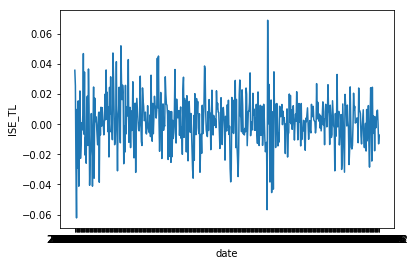

In [249]:
# plot ISE_TL plot 
plt.plot(stock_price['date'],stock_price['ISE_TL'])
plt.xlabel("date")
plt.ylabel("ISE_TL")
plt.show()

Text(0, 0.5, 'ISE_US')

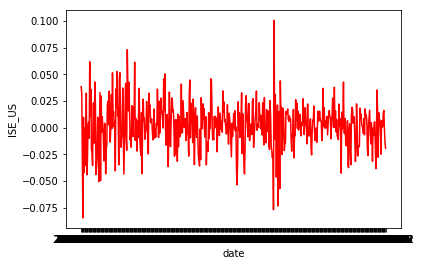

In [250]:
plt.plot(stock_price['date'],stock_price['ISE_USD'], color='red')
plt.xlabel("date")
plt.ylabel("ISE_US")

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
stock_price.head(3)

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,date
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,2009-01-05
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,2009-01-06
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,2009-01-07


Transforming column date in the number of day of the year

In [251]:
stock_price["date"] = pd.to_datetime(stock_price["date"],infer_datetime_format=True)
stock_price["date"] = stock_price["date"].dt.dayofyear #change the full date to day of year

In [252]:
stock_price.head()

,ISE_TL,ISE_USD,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,date
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,5
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,6
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,7
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,8
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,9


#### The first step will be to split data into independent features and dependent vector

In [255]:
X = (stock_price.iloc[:,1:])
y = stock_price.iloc[:, 0]

In [256]:
X.shape

(536, 9)

In [257]:
y.shape

(536,)

#### Split data in training and testing data

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
X_train.shape, X_test.shape

((428, 9), (108, 9))

## Keras Model Configuration: Neural Network API

Now, we train the neural network.

We are using the 9 input variables, along with two hidden layers of 12 and 8 neurons respectively, and finally using the linear activation function to process the output

In [349]:
#import library
import keras
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

model = Sequential() #which represents a linear grouping of layers
n_cols = X_train.shape[1] #number of input layers
model.add(Dense(12,input_dim =n_cols, kernel_initializer='normal' , activation='relu' )) #we use Relu as an actvation function
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_72 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 13        
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


## The mean_squared_error (mse) is our loss function, an estimate of how accurate the neural network is in predicting the test data.

In [350]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])



## Neural Network Output: Let’s now fit our model
We can see that with the validation_split set to 0.2, 80% of the training data is used to test the model, while the remaining 20% is used for testing purposes.

In [355]:
history = model.fit(X_train, y_train, epochs=150, batch_size=40,  verbose=1, validation_split=0.2)
history

Train on 342 samples, validate on 86 samples
Epoch 1/150
342/342 [==============================] - 0s 71us/step - loss: 3.7559e-05 - mse: 3.7559e-05 - val_loss: 3.0670e-05 - val_mse: 3.0670e-05
Epoch 2/150
342/342 [==============================] - 0s 81us/step - loss: 3.9971e-05 - mse: 3.9971e-05 - val_loss: 2.7911e-05 - val_mse: 2.7911e-05
Epoch 3/150
342/342 [==============================] - 0s 64us/step - loss: 4.1134e-05 - mse: 4.1134e-05 - val_loss: 2.9607e-05 - val_mse: 2.9607e-05
Epoch 4/150
342/342 [==============================] - 0s 74us/step - loss: 3.7011e-05 - mse: 3.7011e-05 - val_loss: 2.7747e-05 - val_mse: 2.7747e-05
Epoch 5/150
342/342 [==============================] - 0s 64us/step - loss: 3.4724e-05 - mse: 3.4724e-05 - val_loss: 2.7907e-05 - val_mse: 2.7907e-05
Epoch 6/150
342/342 [==============================] - 0s 72us/step - loss: 3.4682e-05 - mse: 3.4682e-05 - val_loss: 2.7359e-05 - val_mse: 2.7359e-05
Epoch 7/150
342/342 [==============================] - 

### From the output, we can see that the more epochs are run, the lower our MSE  become, indicating improvement in accuracy across each iteration of our model.
Here, we can see that keras is calculating both the training loss and validation loss, i.e. the deviation between the predicted y and actual y as measured by the mean squared error.

As you can see, we have specified 150 epochs for our model. This means that we are essentially training our model over 150 forward and backward passes, with the expectation that our loss will decrease with each epoch, meaning that our model is predicting the value of y more accurately as we continue to train the model

## Let’s see what this looks like when we plot our respective losses:

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


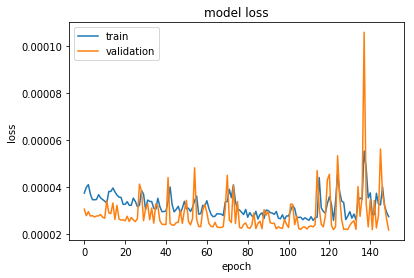

In [356]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Make prediction with test data

In [357]:
predictions = model.predict(X_test)

In [358]:

print('Variance score: %.2f' % r2_score(y_test,predictions))
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))


Variance score: 0.91
Mean squared error: 0.00


In [341]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

108/108 [==============================] - 0s 102us/step
Test accuracy: 0.0001741421438055113


In [342]:
n=model.predict(X_test[2:3])
n

array([[0.01276201]], dtype=float32)

## What we did:
- Construct neural networks with Keras
- Calculate training and test losses
- Make predictions using the neural network model